In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.style.use('seaborn-darkgrid')

In [2]:
accuracy_exp = pd.read_csv('accuracy_exp.csv')
accuracy_exp.shape

(100, 13)

In [3]:
accuracy_exp1 = pd.read_csv('accuracy_exp1.csv')
accuracy_exp1.shape

(100, 19)

In [4]:
accuracy_combined = pd.concat([accuracy_exp, accuracy_exp1], axis=1, join="inner")
accuracy_combined.shape

(100, 32)

In [5]:
loss_exp = pd.read_csv('loss_exp.csv')
loss_exp.shape

(100, 13)

In [6]:
loss_exp1 = pd.read_csv('loss_exp1.csv')
loss_exp1.shape

(100, 19)

In [7]:
loss_combined = pd.concat([loss_exp, loss_exp1], axis=1, join="inner")
loss_combined = loss_combined.loc[:, ~loss_combined.columns.duplicated()]
loss_combined

,Epocs,softmax_avg,softmax_median,softmax_std,softmax_var,softmax_max,softmax_min,sigmoid_avg,sigmoid_median,sigmoid_std,...,sgd_std,sgd_var,sgd_max,sgd_min,sgd_lr_avg,sgd_lr_median,sgd_lr_std,sgd_lr_var,sgd_lr_max,sgd_lr_min
0,0,3.280537,3.274272,0.354235,0.125482,4.554461,2.676888,3.455427,3.414622,0.297850,...,0.060359,0.003643,4.553952,4.331206,4.463066,4.471724,0.060359,0.003643,4.553952,4.331206
1,1,2.222986,2.194451,0.281057,0.078993,3.266632,1.803421,2.436812,2.393014,0.302318,...,0.142245,0.020234,4.346906,3.837519,4.074242,4.048314,0.142245,0.020234,4.346906,3.837519
2,2,1.671975,1.659750,0.132260,0.017493,2.683015,1.483692,1.820975,1.807117,0.146787,...,0.038173,0.001457,3.935697,3.722643,3.823134,3.821478,0.038173,0.001457,3.935697,3.722643
3,3,1.453428,1.446275,0.094799,0.008987,2.346617,1.322200,1.553680,1.543002,0.094550,...,0.026931,0.000725,3.844895,3.666700,3.767158,3.764797,0.026931,0.000725,3.844895,3.666700
4,4,1.327703,1.323971,0.079810,0.006370,2.143283,1.226230,1.398881,1.394161,0.079311,...,0.025943,0.000673,3.815936,3.644643,3.747678,3.745836,0.025943,0.000673,3.815936,3.644643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.506978,0.502159,0.044237,0.001957,1.031381,0.466550,0.529068,0.525025,0.041634,...,0.032998,0.001089,3.527153,3.183605,3.269694,3.266704,0.032998,0.001089,3.527153,3.183605
96,96,0.505082,0.501910,0.043686,0.001908,1.020387,0.467103,0.527568,0.523673,0.042346,...,0.033082,0.001094,3.530097,3.183247,3.266795,3.262864,0.033082,0.001094,3.530097,3.183247
97,97,0.503820,0.498507,0.043003,0.001849,1.005529,0.462566,0.524860,0.521450,0.042255,...,0.033041,0.001092,3.529347,3.180913,3.264108,3.260716,0.033041,0.001092,3.529347,3.180913
98,98,0.503877,0.498381,0.044426,0.001974,1.030767,0.466169,0.525059,0.520912,0.041519,...,0.033430,0.001118,3.533979,3.177617,3.261401,3.258802,0.033430,0.001118,3.533979,3.177617


D:\apps\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
D:\apps\Anaconda\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


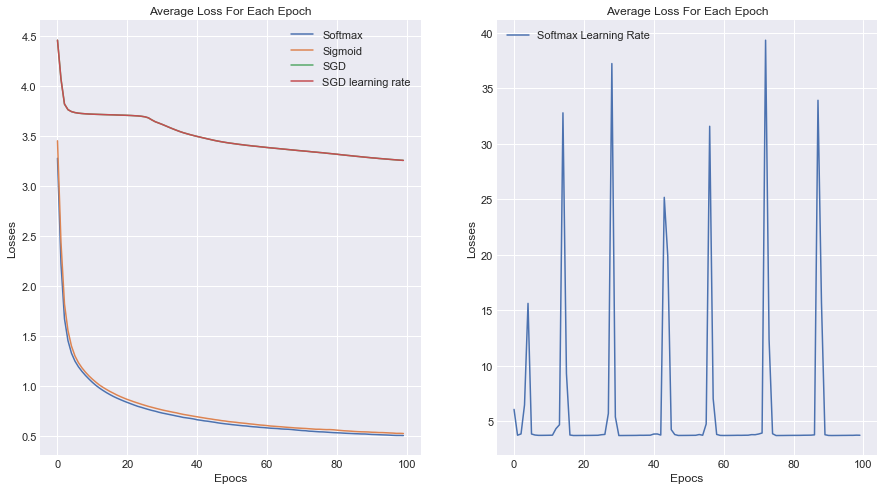

In [8]:
x= [i for i in range(0,100)]
plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.plot(x, loss_combined['softmax_avg'], label = "Softmax",)
plt.plot(x, loss_combined['sigmoid_avg'], label = "Sigmoid",)
plt.plot(x, loss_combined['sgd_avg'], label = "SGD", )
plt.plot(x, loss_combined['sgd_lr_avg'], label = "SGD learning rate")

plt.xlabel('Epocs')
plt.ylabel('Losses')
plt.title('Average Loss For Each Epoch')

plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, loss_combined['softmax_lr_avg'], label = "Softmax Learning Rate")

plt.xlabel('Epocs')
plt.ylabel('Losses')
plt.title('Average Loss For Each Epoch')

plt.legend()
plt.show()

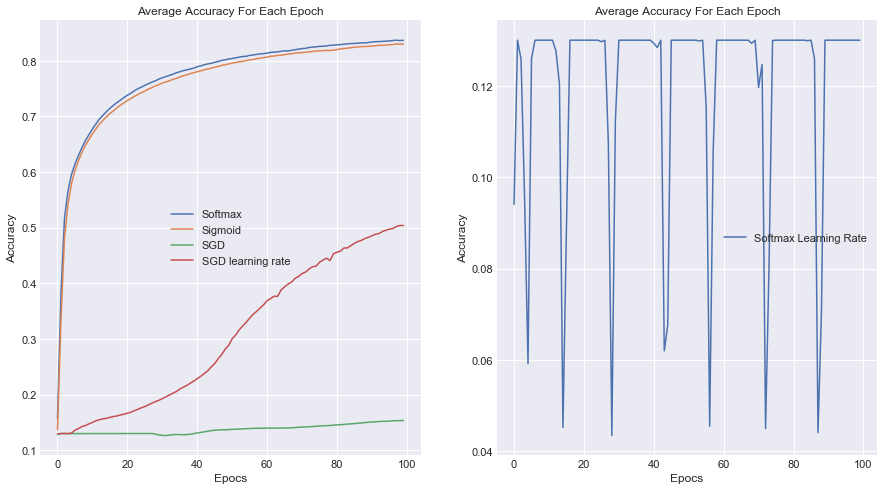

In [9]:
x= [i for i in range(0,100)]
plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.plot(x, accuracy_combined['softmax_avg'], label = "Softmax",)
plt.plot(x, accuracy_combined['sigmoid_avg'], label = "Sigmoid",)
plt.plot(x, accuracy_combined['sgd_avg'], label = "SGD", )
plt.plot(x, accuracy_combined['sgd_lr_avg'], label = "SGD learning rate")

plt.xlabel('Epocs')
plt.ylabel('Accuracy')
plt.title('Average Accuracy For Each Epoch')

plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, accuracy_combined['softmax_lr_avg'], label = "Softmax Learning Rate")

plt.xlabel('Epocs')
plt.ylabel('Accuracy')
plt.title('Average Accuracy For Each Epoch')

plt.legend()
plt.show()

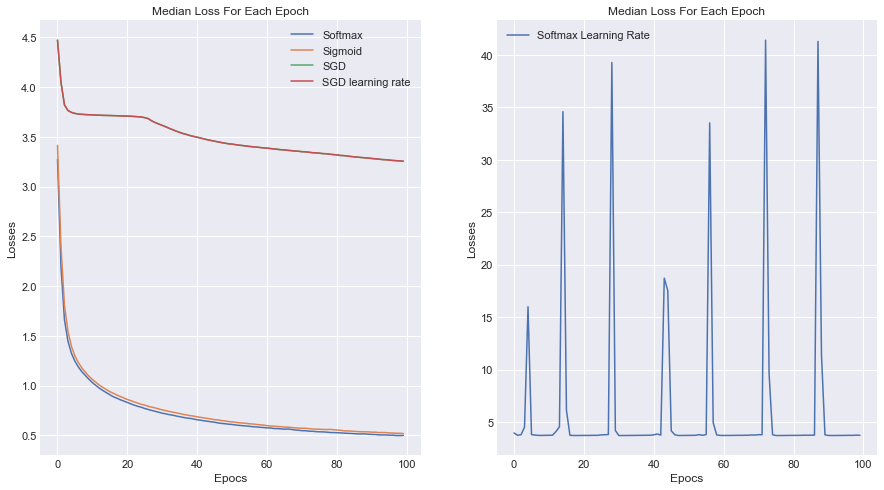

In [10]:
x= [i for i in range(0,100)]
plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.plot(x, loss_combined['softmax_median'], label = "Softmax",)
plt.plot(x, loss_combined['sigmoid_median'], label = "Sigmoid",)
plt.plot(x, loss_combined['sgd_median'], label = "SGD", )
plt.plot(x, loss_combined['sgd_lr_median'], label = "SGD learning rate")

plt.xlabel('Epocs')
plt.ylabel('Losses')
plt.title('Median Loss For Each Epoch')

plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, loss_combined['softmax_lr_median'], label = "Softmax Learning Rate")

plt.xlabel('Epocs')
plt.ylabel('Losses')
plt.title('Median Loss For Each Epoch')

plt.legend()
plt.show()

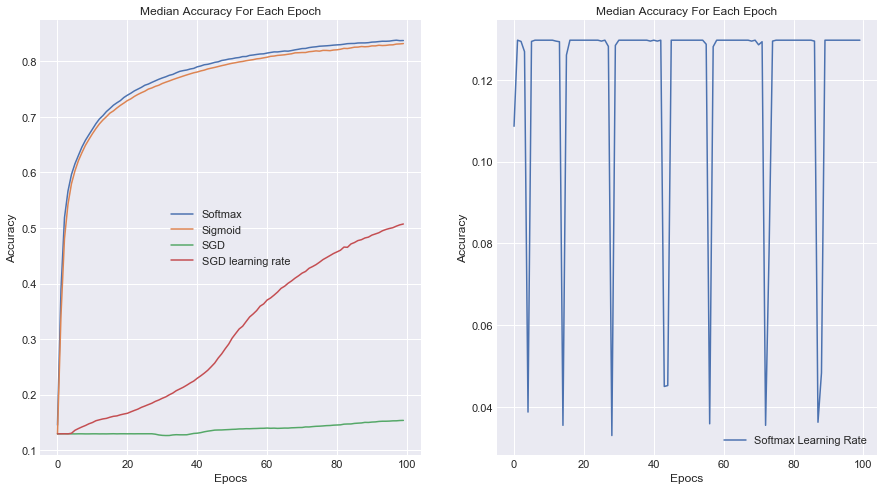

In [11]:
x= [i for i in range(0,100)]
plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.plot(x, accuracy_combined['softmax_median'], label = "Softmax",)
plt.plot(x, accuracy_combined['sigmoid_median'], label = "Sigmoid",)
plt.plot(x, accuracy_combined['sgd_median'], label = "SGD", )
plt.plot(x, accuracy_combined['sgd_lr_median'], label = "SGD learning rate")

plt.xlabel('Epocs')
plt.ylabel('Accuracy')
plt.title('Median Accuracy For Each Epoch')

plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, accuracy_combined['softmax_lr_median'], label = "Softmax Learning Rate")

plt.xlabel('Epocs')
plt.ylabel('Accuracy')
plt.title('Median Accuracy For Each Epoch')

plt.legend()
plt.show()

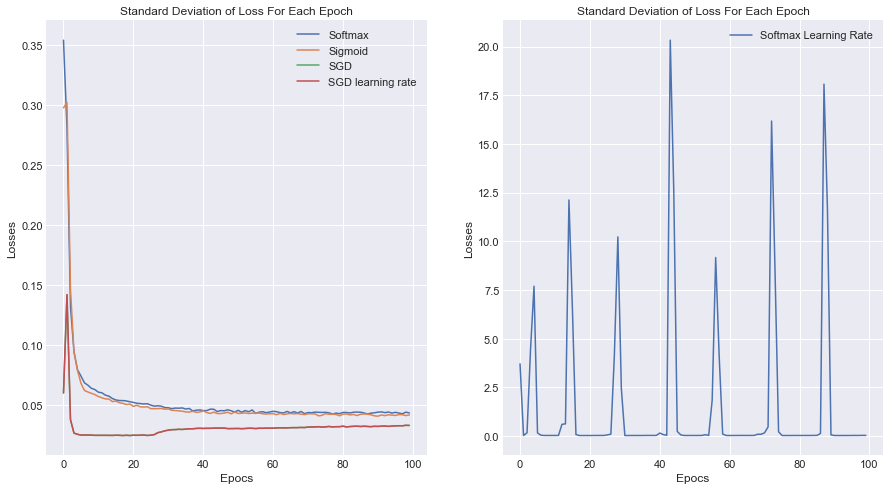

In [12]:
x= [i for i in range(0,100)]
plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.plot(x, loss_combined['softmax_std'], label = "Softmax",)
plt.plot(x, loss_combined['sigmoid_std'], label = "Sigmoid",)
plt.plot(x, loss_combined['sgd_std'], label = "SGD", )
plt.plot(x, loss_combined['sgd_lr_std'], label = "SGD learning rate")

plt.xlabel('Epocs')
plt.ylabel('Losses')
plt.title('Standard Deviation of Loss For Each Epoch')

plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, loss_combined['softmax_lr_std'], label = "Softmax Learning Rate")

plt.xlabel('Epocs')
plt.ylabel('Losses')
plt.title('Standard Deviation of Loss For Each Epoch')

plt.legend()
plt.show()

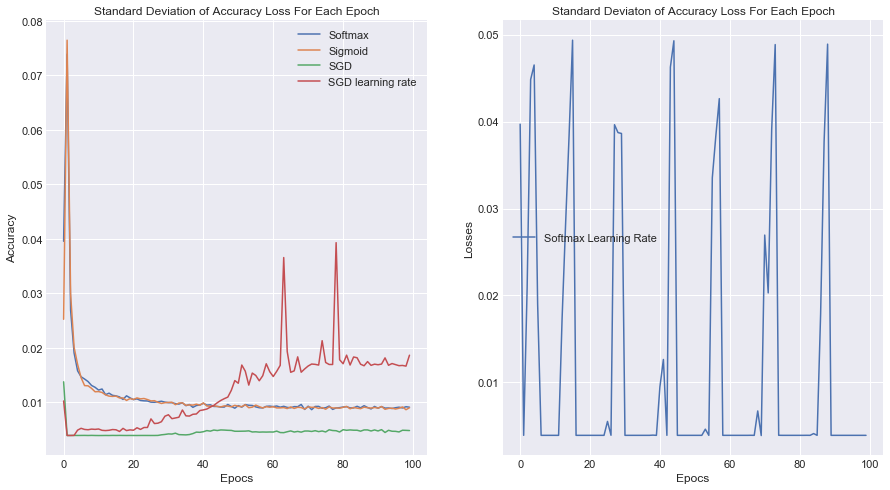

In [13]:
x= [i for i in range(0,100)]
plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.plot(x, accuracy_combined['softmax_std'], label = "Softmax",)
plt.plot(x, accuracy_combined['sigmoid_std'], label = "Sigmoid",)
plt.plot(x, accuracy_combined['sgd_std'], label = "SGD", )
plt.plot(x, accuracy_combined['sgd_lr_std'], label = "SGD learning rate")

plt.xlabel('Epocs')
plt.ylabel('Accuracy')
plt.title('Standard Deviation of Accuracy Loss For Each Epoch')

plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, accuracy_combined['softmax_lr_std'], label = "Softmax Learning Rate")

plt.xlabel('Epocs')
plt.ylabel('Losses')
plt.title('Standard Deviaton of Accuracy Loss For Each Epoch')

plt.legend()
plt.show()

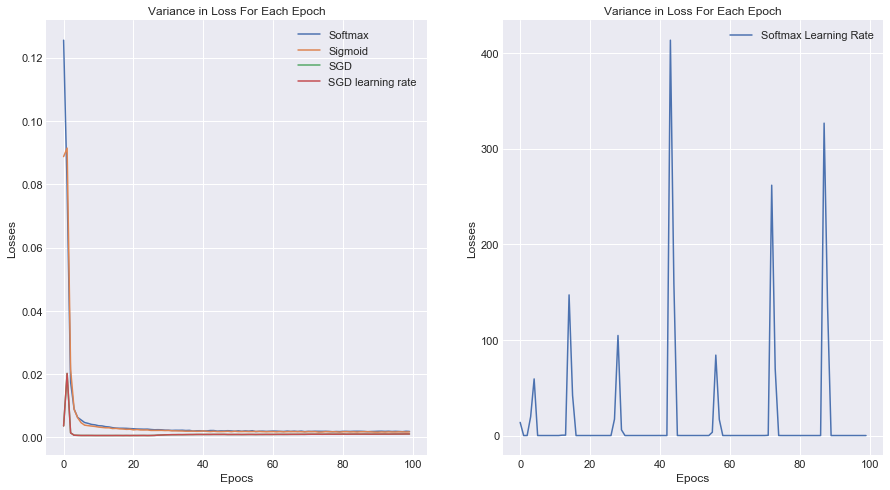

In [14]:
x= [i for i in range(0,100)]
plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.plot(x, loss_combined['softmax_var'], label = "Softmax",)
plt.plot(x, loss_combined['sigmoid_var'], label = "Sigmoid",)
plt.plot(x, loss_combined['sgd_var'], label = "SGD", )
plt.plot(x, loss_combined['sgd_lr_var'], label = "SGD learning rate")

plt.xlabel('Epocs')
plt.ylabel('Losses')
plt.title('Variance in Loss For Each Epoch')

plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, loss_combined['softmax_lr_var'], label = "Softmax Learning Rate")

plt.xlabel('Epocs')
plt.ylabel('Losses')
plt.title('Variance in Loss For Each Epoch')

plt.legend()
plt.show()

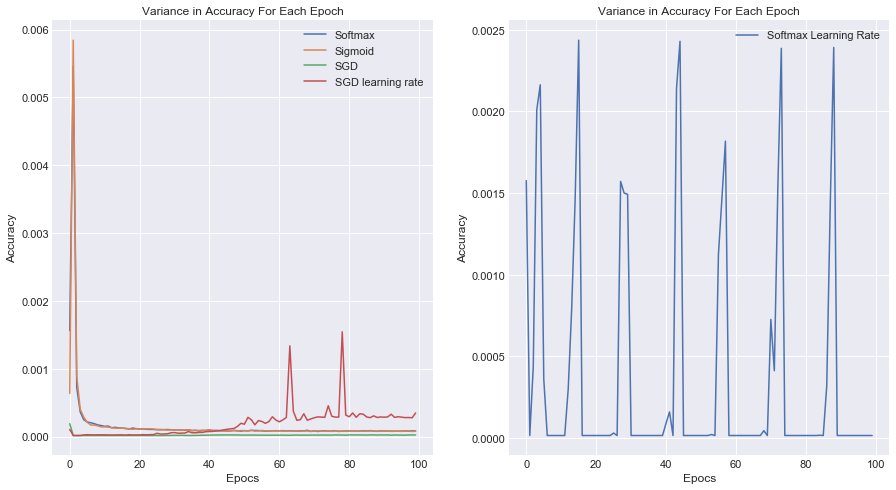

In [15]:
x= [i for i in range(0,100)]
plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.plot(x, accuracy_combined['softmax_var'], label = "Softmax",)
plt.plot(x, accuracy_combined['sigmoid_var'], label = "Sigmoid",)
plt.plot(x, accuracy_combined['sgd_var'], label = "SGD", )
plt.plot(x, accuracy_combined['sgd_lr_var'], label = "SGD learning rate")

plt.xlabel('Epocs')
plt.ylabel('Accuracy')
plt.title('Variance in Accuracy For Each Epoch')

plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, accuracy_combined['softmax_lr_var'], label = "Softmax Learning Rate")

plt.xlabel('Epocs')
plt.ylabel('Accuracy')
plt.title('Variance in Accuracy For Each Epoch')

plt.legend()
plt.show()

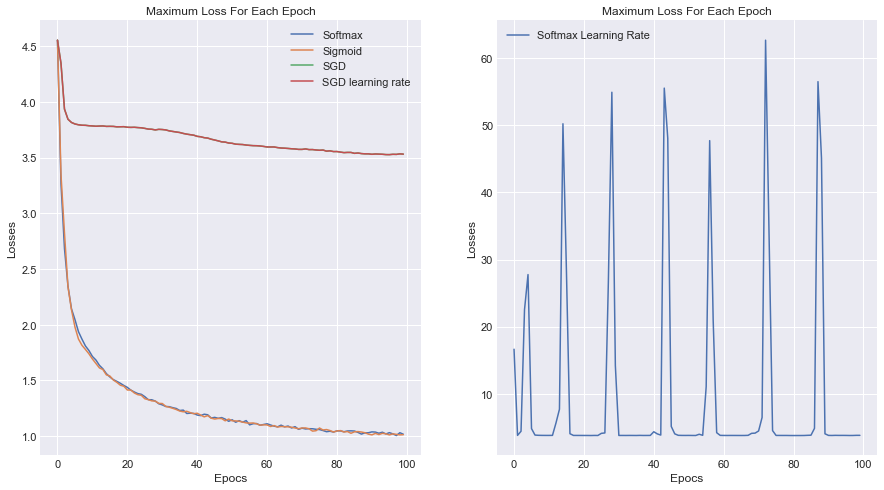

In [16]:
x= [i for i in range(0,100)]
plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.plot(x, loss_combined['softmax_max'], label = "Softmax",)
plt.plot(x, loss_combined['sigmoid_max'], label = "Sigmoid",)
plt.plot(x, loss_combined['sgd_max'], label = "SGD", )
plt.plot(x, loss_combined['sgd_lr_max'], label = "SGD learning rate")

plt.xlabel('Epocs')
plt.ylabel('Losses')
plt.title('Maximum Loss For Each Epoch')

plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, loss_combined['softmax_lr_max'], label = "Softmax Learning Rate")

plt.xlabel('Epocs')
plt.ylabel('Losses')
plt.title('Maximum Loss For Each Epoch')

plt.legend()
plt.show()

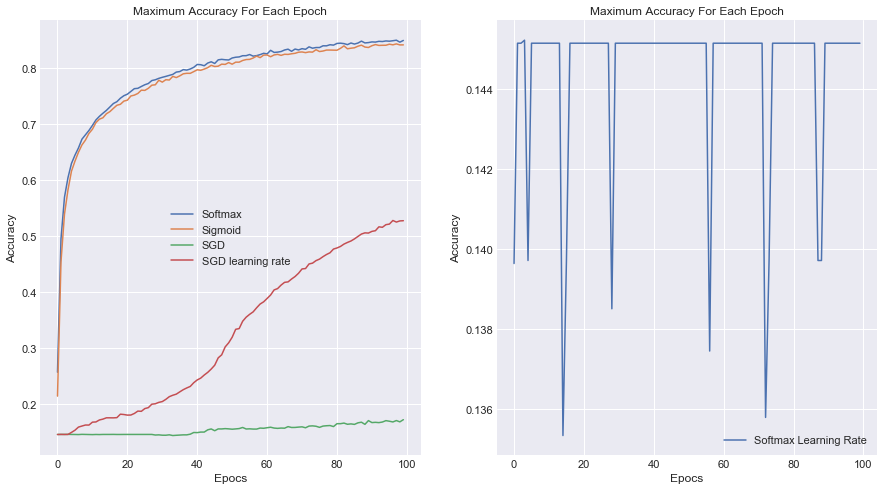

In [17]:
x= [i for i in range(0,100)]
plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.plot(x, accuracy_combined['softmax_max'], label = "Softmax",)
plt.plot(x, accuracy_combined['sigmoid_max'], label = "Sigmoid",)
plt.plot(x, accuracy_combined['sgd_max'], label = "SGD", )
plt.plot(x, accuracy_combined['sgd_lr_max'], label = "SGD learning rate")

plt.xlabel('Epocs')
plt.ylabel('Accuracy')
plt.title('Maximum Accuracy For Each Epoch')

plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, accuracy_combined['softmax_lr_max'], label = "Softmax Learning Rate")

plt.xlabel('Epocs')
plt.ylabel('Accuracy')
plt.title('Maximum Accuracy For Each Epoch')

plt.legend()
plt.show()

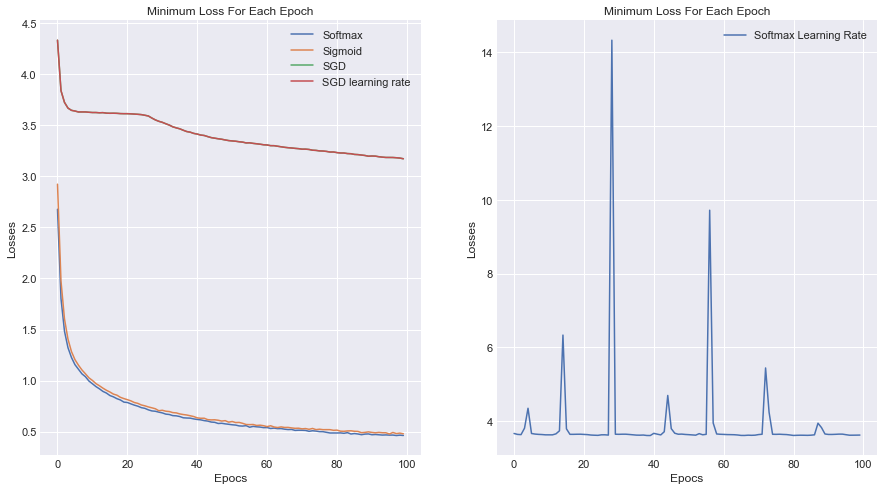

In [18]:
x= [i for i in range(0,100)]
plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.plot(x, loss_combined['softmax_min'], label = "Softmax",)
plt.plot(x, loss_combined['sigmoid_min'], label = "Sigmoid",)
plt.plot(x, loss_combined['sgd_min'], label = "SGD", )
plt.plot(x, loss_combined['sgd_lr_min'], label = "SGD learning rate")

plt.xlabel('Epocs')
plt.ylabel('Losses')
plt.title('Minimum Loss For Each Epoch')

plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, loss_combined['softmax_lr_min'], label = "Softmax Learning Rate")

plt.xlabel('Epocs')
plt.ylabel('Losses')
plt.title('Minimum Loss For Each Epoch')

plt.legend()
plt.show()

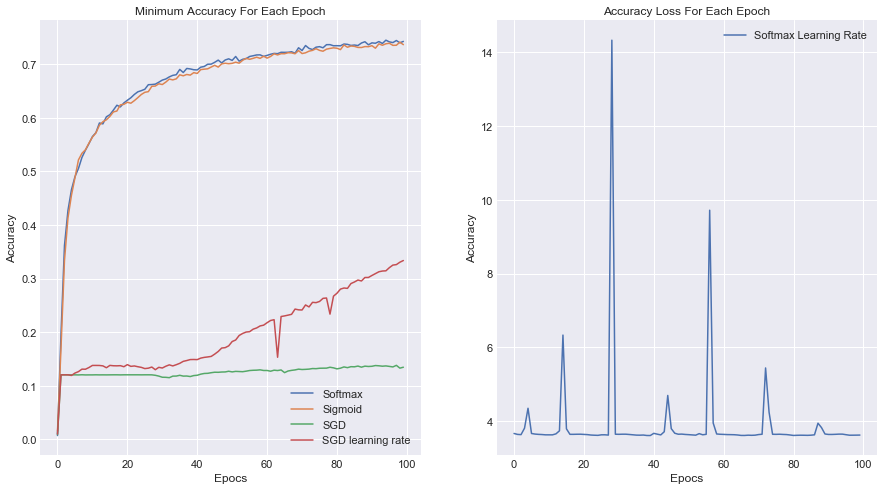

In [19]:
x= [i for i in range(0,100)]
plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.plot(x, accuracy_combined['softmax_min'], label = "Softmax",)
plt.plot(x, accuracy_combined['sigmoid_min'], label = "Sigmoid",)
plt.plot(x, accuracy_combined['sgd_min'], label = "SGD", )
plt.plot(x, accuracy_combined['sgd_lr_min'], label = "SGD learning rate")

plt.xlabel('Epocs')
plt.ylabel('Accuracy')
plt.title('Minimum Accuracy For Each Epoch')

plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, loss_combined['softmax_lr_min'], label = "Softmax Learning Rate")

plt.xlabel('Epocs')
plt.ylabel('Accuracy')
plt.title('Accuracy Loss For Each Epoch')

plt.legend()
plt.show()